In [1]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt

In [2]:
map = "./Map/Map.shp"
dados = "../scr/casos_municipio.csv"

bahia = geopandas.read_file(map)

df = pd.read_csv(dados)
df = df.drop(columns="Unnamed: 0")
df.iloc[:, 2] = df.iloc[:, 2].astype('int')
df = df.rename(columns={df.columns[2]: "Casos"})

In [3]:
bahia["Casos"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "MUNICIPIO"] == df.loc[j, "Município"]:
            bahia.loc[i, "Casos"] = df.loc[j, "Casos"]


In [20]:
plt.rcParams["figure.figsize"] = (10, 10)

In [23]:
bahia["Casos"].describe()

count     417.000000
mean       88.381295
std       418.329083
min         0.000000
25%         1.000000
50%         5.000000
75%        32.000000
max      6642.000000
Name: Casos, dtype: float64

array([[<AxesSubplot:title={'center':'Casos'}>]], dtype=object)

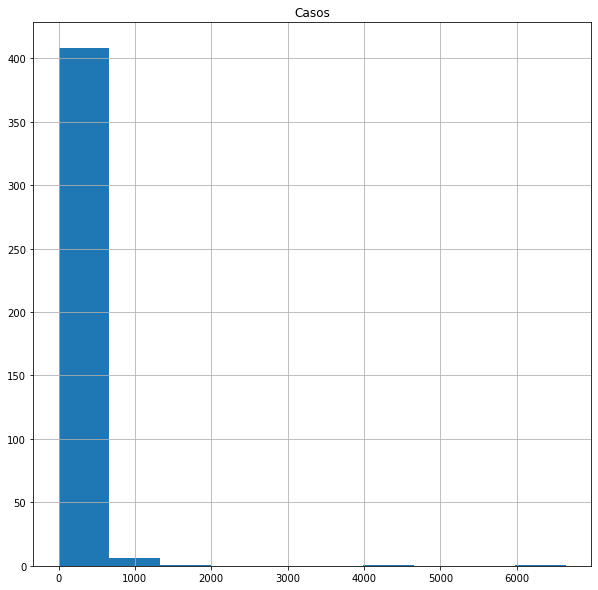

In [24]:
bahia.hist(column="Casos")

Plotagem automatica

In [30]:
std_val = int(bahia["Casos"].std())
max_val = bahia["Casos"].max()
intervalo = [std_val, 2*std_val, 3*std_val, max_val]
intervalo

In [28]:
plt.rcParams["figure.figsize"] = (20, 20)

<AxesSubplot:>

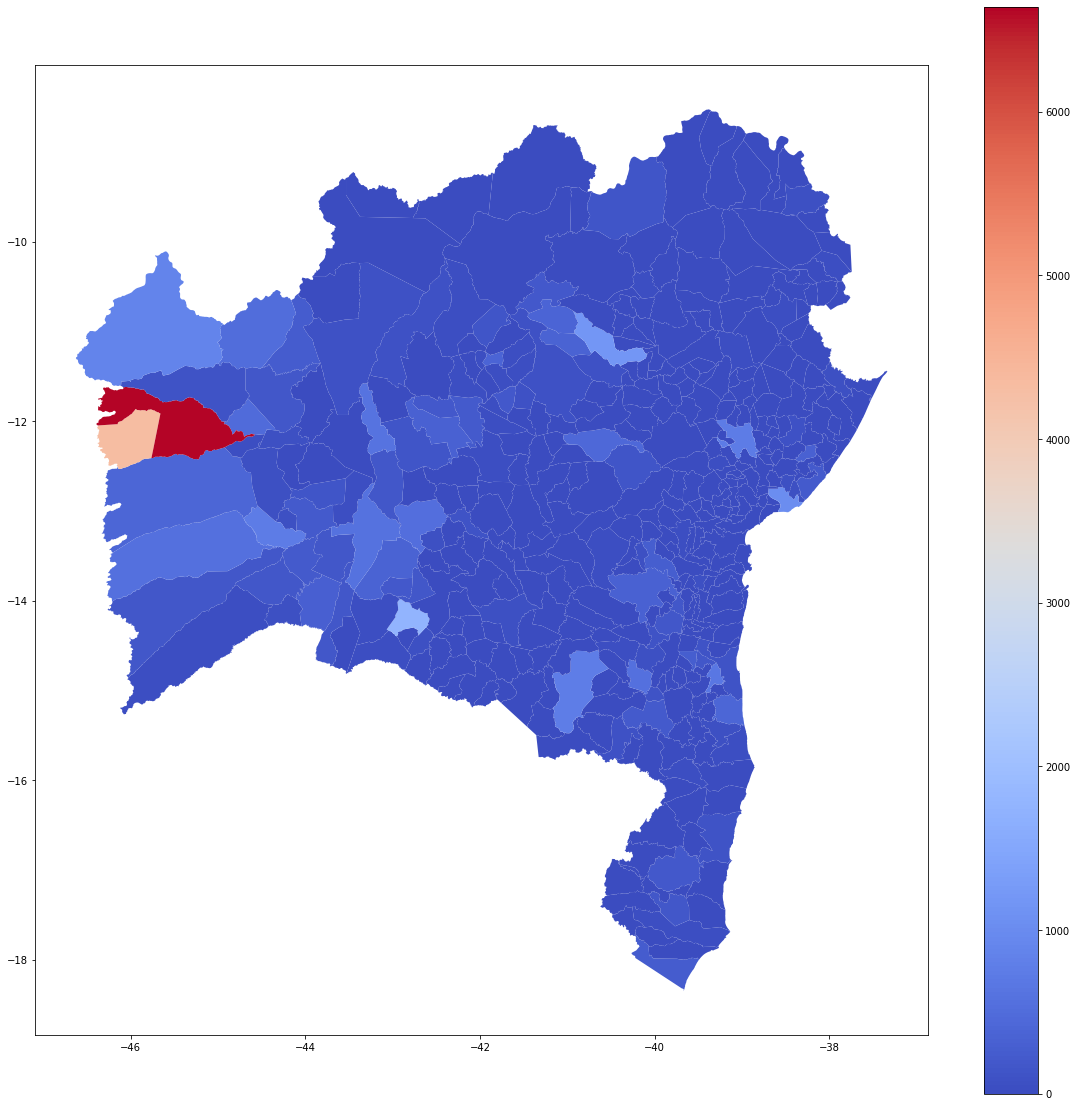

In [9]:
bahia.plot(column='Casos', cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em quantis

<AxesSubplot:>

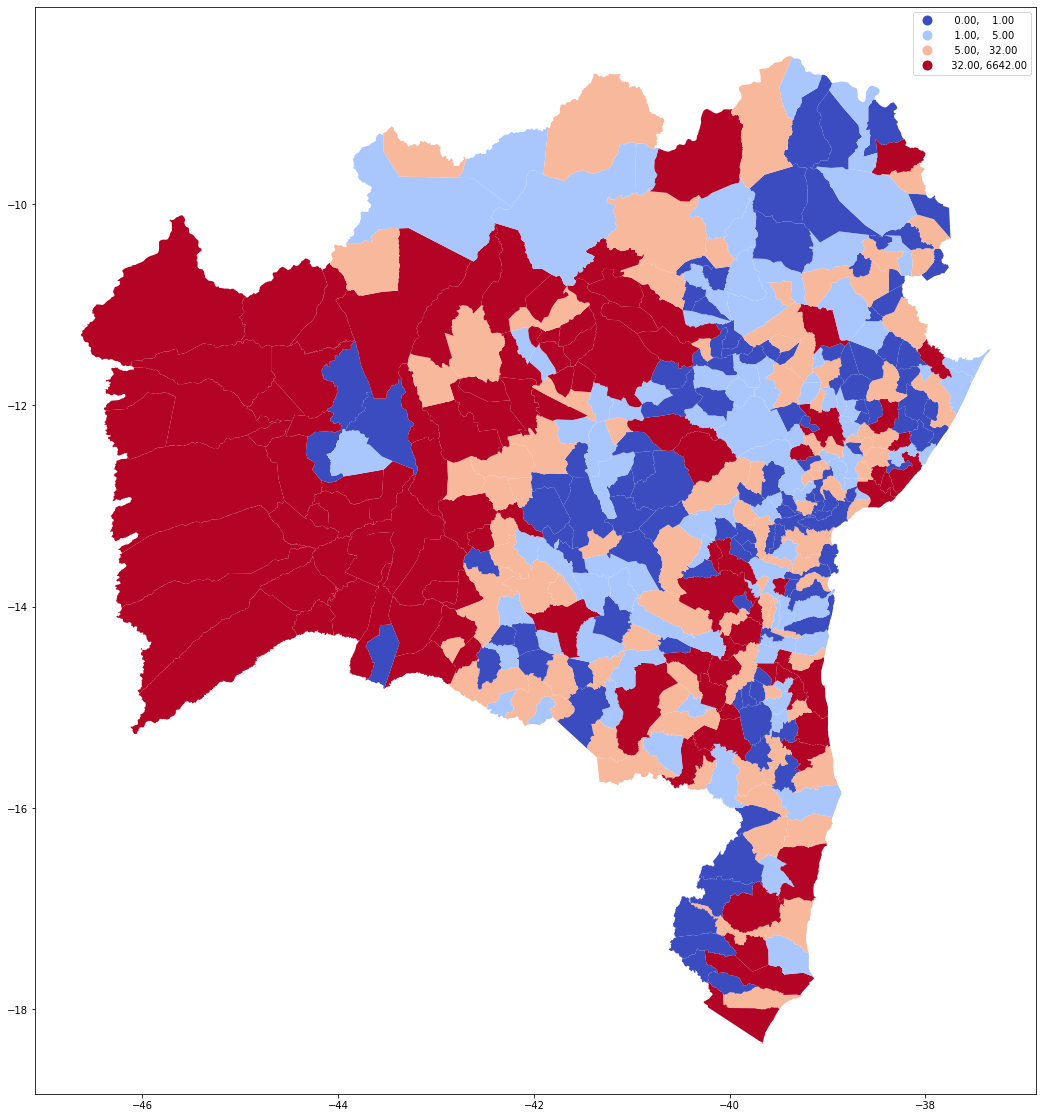

In [10]:
bahia.plot(column='Casos', scheme='quantiles', k=4, cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em desvio padrão

<AxesSubplot:>

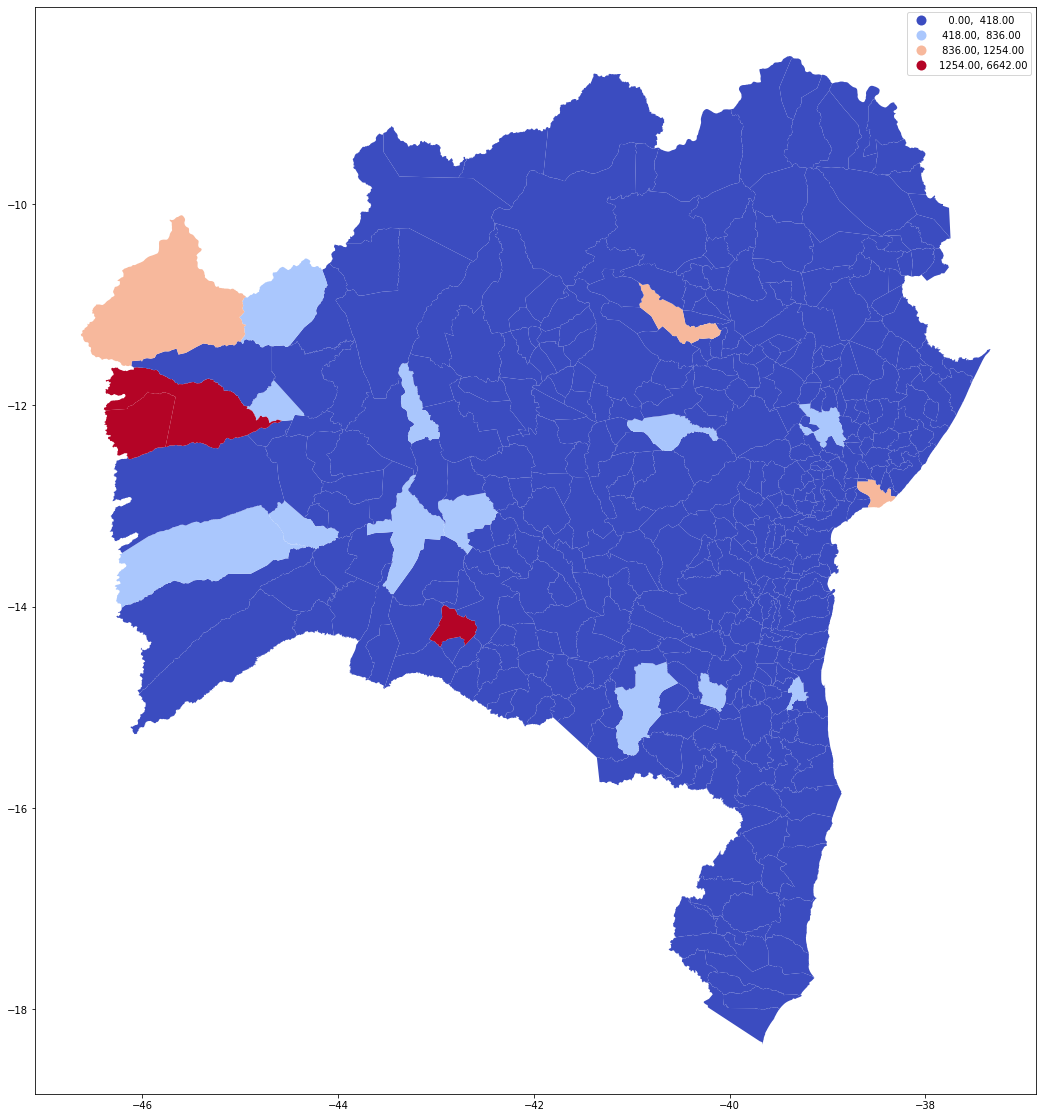

In [37]:
bahia.plot(column='Casos', scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True)